<a href="https://colab.research.google.com/github/Umaporn19/multivariate/blob/main/Multivariate_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ให้นักศึกษาทำข้อสอบใน Colab Notebook นี้โดยกรอกข้อมูลของตัวเองใน cell ที่ 2 แล้วรัน cell ที่ 1 - 5 และเริ่มทำข้อสอบใน cell ที่ 6 เป็นต้นไป

โดยโจทย์คือ
1. ข้อมูลโจทย์ อยู่ใน ตัวแปร ```Data```
2. ทำ clustering แล้วทำ visualize ข้อมูลแบบ 2 มิติ
3. ลด Dimension ของข้อมูลเหลือ 2 มิติ แล้วทำ clustering แล้ว visualize ข้อมูลแบบ 2 มิติ
4. เปรียบเทียบความแตกต่างของผลข้อ 2. กับ ข้อ 3.
5. เขียน comments อธิบายทุกขั้นตอน
6. อัด video อธิบาย code ทุกๆขั้นตอนรวมถึงผลแล้วอัพลง youtube ในรูปแบบ unlist 
7. commit โดยใช้ชื่อ commit เป็น link youtube ที่อธิบาย code ในข้อ 6.

กำหนดส่งวันที่ 2 พฤษภาคม 2564 (โดยให้มากรอกวันที่ commit ครั้งสุดท้ายใน sheet: https://docs.google.com/spreadsheets/d/1_qJwLDJVtOW1HxBcf_FHVc6UT4J_SOonuR6o3EEnVzw/edit?usp=sharing ช่อง Final)

In [2]:
from sklearn.datasets import make_blobs
import random,math
import numpy as np
import pandas

In [3]:
Name = 'อุมาพร คำภิชัย'
ID = '6230205470'

In [4]:
def DataGenerator(name,id):
    random.seed(int(id[3:6]))
    numfeat = random.randint(20,30)
    ct = random.randint(len(name)-6,len(name))
    
    X, y = make_blobs(n_samples=10000, centers=ct, n_features=numfeat , random_state=int(id[3:6]))

    print(f'{id[3:6]}:{numfeat}:{ct}')
    X_t = (X[:,1]*2)+int(id[3])
    X_t2 = (X[:,-1]*5)+int(id[4])

    DT = np.append(X,X_t.reshape([10000,1]),axis=1)
    DT = np.append(DT,X_t2.reshape([10000,1]),axis=1)
    
    return pandas.DataFrame(DT)

In [5]:
Data = DataGenerator(Name,ID)

020:30:14


In [6]:
Data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,5.779841,9.590162,7.580040,-4.278572,-6.772580,-3.337118,9.763874,2.163429,8.836751,-9.402668,6.069058,-9.942346,-9.473521,-8.133425,-3.969872,-0.409420,7.109384,7.607849,1.669154,7.170246,-8.165292,4.877405,-7.617871,-6.756496,8.850628,-5.386895,7.550170,1.864166,4.126644,2.942146,19.180325,16.710729
1,-1.969309,-5.779929,-0.479035,7.120809,-6.967939,-2.562261,-1.431636,-2.876955,-8.809777,-7.156166,9.225777,-5.276836,-10.170002,-0.050986,2.987005,-1.758751,9.133687,-4.224050,6.810339,0.860089,4.585015,2.999504,-7.098761,-8.103267,8.184693,9.626054,3.503491,-0.090879,-0.446152,7.465699,-11.559858,39.328496
2,3.599102,3.524340,-6.054480,-9.089953,5.181669,-0.834194,-3.931799,-0.137943,-4.589369,-2.365034,3.685007,0.919187,-3.120397,-2.182186,-4.271154,2.253673,-6.701235,3.455984,7.511894,-4.712591,5.952467,-0.483959,3.421101,5.602329,7.429803,0.191208,2.966675,2.952572,-2.706058,2.749403,7.048680,15.747013
3,2.610732,2.268904,-4.365511,-8.991586,6.929414,0.396067,-3.116764,0.122945,-4.237205,-4.860459,1.596553,1.567507,-2.599508,-1.812618,-5.665761,4.284519,-6.163315,2.150961,6.780581,-7.338840,4.205672,-1.683074,4.436318,7.012761,4.945608,2.722019,1.213484,2.704299,-0.405857,0.589666,4.537807,4.948332
4,1.229763,6.218683,6.069170,7.837148,-7.564717,9.068409,8.398188,-6.073507,5.877496,-2.328447,-1.386795,2.800630,8.479073,6.045114,9.387522,3.651719,-8.845904,8.773557,-4.049647,4.501112,7.998507,-0.474366,6.817369,8.979003,11.270047,-5.587750,-4.801151,-4.927810,-0.572961,7.252844,12.437365,38.264218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,4.115431,7.000837,-9.653089,-7.160725,9.323379,0.008322,8.853850,2.496611,3.815244,0.382697,6.690362,-3.427856,-4.262191,-1.233465,-2.097576,6.860297,-3.083898,-1.410190,-0.426802,-2.115237,2.321582,-6.152592,4.205598,-4.351731,9.674877,-8.252335,6.537963,-1.520673,-7.923699,3.938198,14.001675,21.690991
9996,8.642016,-10.310443,-4.164195,-0.103425,5.280763,10.100324,10.376776,2.035528,-2.865085,-3.634668,3.175611,3.091032,4.854759,-3.718518,9.154610,7.477065,-5.644479,3.183633,7.624630,-10.160440,-6.843769,9.264963,6.128426,4.705592,9.834965,-6.510483,-8.046730,5.285699,-0.492100,4.496800,-20.620886,24.484000
9997,2.576362,-2.282850,-1.977706,7.939707,1.760702,-6.222240,3.906714,-4.212861,7.771867,-2.179046,-7.370692,1.098961,-5.226815,-7.994809,-3.480564,1.547576,1.043375,7.676349,2.609321,-8.077446,6.056793,-7.367577,-8.567476,-3.069323,4.276709,-6.563668,-2.562896,10.299857,8.607741,1.419396,-4.565701,9.096982
9998,5.623216,6.132319,-9.526871,-7.102227,7.470630,1.645184,7.913972,-0.513498,6.165712,-2.734110,7.303640,-0.367817,-4.374165,-1.374892,-1.328014,6.636919,-2.271619,-4.250679,-0.379184,-3.499792,3.763622,-6.828777,4.275611,-3.615921,9.257696,-6.524113,6.213284,-3.265337,-6.691210,4.450119,12.264638,24.250595


In [7]:
Data.shape #ดูว่าข้อมูลมีกี่แถวกี่คอลัมม์ ดูขนาดของข้อมูลที่นำเข้ามา

(10000, 32)

## ข้อ 2

### Import

In [8]:
from sklearn.cluster import KMeans #นำข้อมูลเข้ามาในขั้นตอนนี้

### Difine

In [9]:
kmeans = KMeans(random_state=2021) #เป็นคำสั่งกำหนดค่า K แต้ในที่นี้คือค่า K ที่เป็น Default เรายังไม่กำหนด

### Fit- transform 

#### คำนวณจุด cluter centers ของข้อมูล Data ด้วยวิธี K-means clustering

In [10]:
kmeans.fit(Data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2021, tol=0.0001, verbose=0)

### แสดงจุด cluster centers ที่คำนวณออกมาได้

In [11]:
kmeans.cluster_centers_

array([[ 2.68465309e+00,  5.51281836e+00,  1.59377799e+00,
        -1.14098972e+00, -1.96321082e+00,  1.74906213e+00,
        -2.92547218e+00,  3.21082773e-01, -7.86961544e-01,
        -4.97237840e+00, -1.00286744e+00,  2.73316601e+00,
         9.96214564e-01,  2.42519924e+00,  3.65427957e-01,
        -3.81964919e+00, -7.21604655e+00,  3.49292498e+00,
         6.24430114e-01, -5.86822571e+00,  5.92854052e+00,
         3.57690327e+00,  3.41999915e+00, -1.50558073e-01,
         5.58089454e+00,  8.29768864e-01,  2.99271943e+00,
         4.86660992e+00, -1.14473884e+00,  9.69344807e-02,
         1.10256367e+01,  2.48467240e+00],
       [ 4.81312383e+00, -7.13526097e+00, -3.80883929e+00,
         1.34899279e+00,  4.99552690e+00,  9.41670956e+00,
         5.96973041e+00,  8.03495698e-01, -4.28205996e+00,
        -5.63031415e-01,  1.02225355e+00, -1.86353837e-01,
         3.53121455e+00,  2.77303843e+00,  6.18565004e+00,
         3.71192715e+00, -9.26798331e-01,  5.98123956e+00,
         7.09

### ทดสอบการจัดกลุ่มของ Data 

In [12]:
y = kmeans.predict(Data)
y

array([7, 6, 0, ..., 2, 7, 7], dtype=int32)

### PCA

In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

new_pca = pca.fit_transform(Data)

In [14]:
from matplotlib import pyplot as plt

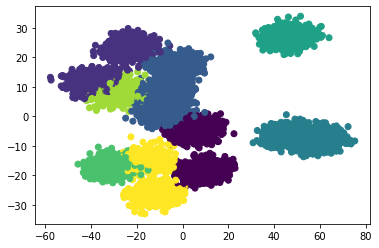

In [15]:
kmeans = KMeans(random_state=2021)
kmeans.fit(Data)
y = kmeans.predict(Data)
plt.scatter(new_pca[:,0],new_pca[:,1],c=y)

### SSE

In [16]:
kmeans = KMeans(random_state=2021)
kmeans.fit(Data)
y = kmeans.predict(Data)

In [17]:
kmeans.cluster_centers_

array([[ 2.68465309e+00,  5.51281836e+00,  1.59377799e+00,
        -1.14098972e+00, -1.96321082e+00,  1.74906213e+00,
        -2.92547218e+00,  3.21082773e-01, -7.86961544e-01,
        -4.97237840e+00, -1.00286744e+00,  2.73316601e+00,
         9.96214564e-01,  2.42519924e+00,  3.65427957e-01,
        -3.81964919e+00, -7.21604655e+00,  3.49292498e+00,
         6.24430114e-01, -5.86822571e+00,  5.92854052e+00,
         3.57690327e+00,  3.41999915e+00, -1.50558073e-01,
         5.58089454e+00,  8.29768864e-01,  2.99271943e+00,
         4.86660992e+00, -1.14473884e+00,  9.69344807e-02,
         1.10256367e+01,  2.48467240e+00],
       [ 4.81312383e+00, -7.13526097e+00, -3.80883929e+00,
         1.34899279e+00,  4.99552690e+00,  9.41670956e+00,
         5.96973041e+00,  8.03495698e-01, -4.28205996e+00,
        -5.63031415e-01,  1.02225355e+00, -1.86353837e-01,
         3.53121455e+00,  2.77303843e+00,  6.18565004e+00,
         3.71192715e+00, -9.26798331e-01,  5.98123956e+00,
         7.09

In [18]:
new_cluster_center = pca.transform(kmeans.cluster_centers_)
new_data_pca = pca.transform(Data)

In [19]:
new_cluster_center

array([[  7.57128318, -11.66329841],
       [-31.37770103,  17.4383376 ],
       [ -6.13388702,   8.53849882],
       [ 53.20325191,  -7.14255305],
       [ 46.45321516,  26.92726675],
       [-30.41762608, -16.75314035],
       [-28.98100198,   8.15666248],
       [-13.75679777, -20.59372891]])

## ค่า K ควรจะเป็นเท่าไหร่

### Elbow Method

In [20]:
kmeans.inertia_ # SSE (Sum of squared Errors)

4633939.742169999

In [21]:
SSE = list()
for k in [1,2,3,4,5,6,7,8]:
    kmeans = KMeans(n_clusters = k , random_state = 2021)
    XX = kmeans.fit(Data)
    SSE.append(kmeans.inertia_)

In [22]:
SSE

[19492074.617149524,
 12287226.791411135,
 10192922.646103252,
 8882237.446246957,
 7776083.319813388,
 6741366.527387712,
 5648010.760576062,
 4633939.742169999]

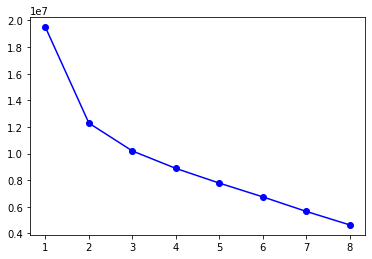

In [23]:
plt.plot([1,2,3,4,5,6,7,8],SSE,'o-b') #จากกราฟจะเห็นได้ว่าค่า K = 3 เพราะมีการเปลี่ยนแปลงของข้อมูลทำให้เราทราบว่ากราฟดังกล่าวมีค่า K = 3

### The silhouette coefficient

In [24]:
from sklearn import metrics

In [25]:
SilH = list()
for k in [2,3,4,5,6,7,8]:
    kmeans = KMeans(n_clusters=k, random_state=2021)
    kmeans.fit(Data)
    score = metrics.silhouette_score(Data,kmeans.labels_)
    SilH.append(score)

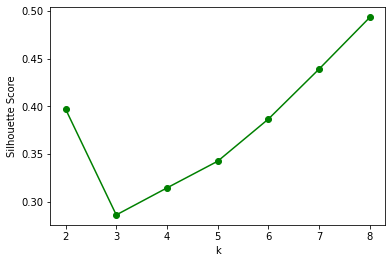

In [26]:
plt.plot([2,3,4,5,6,7,8],SilH,'o-g')
plt.xlabel('k')
plt.ylabel('Silhouette Score');

# จากกราฟที่ได้จะเห็นว่าข้อมูลแบ่งออกได้ 3 กลุ่ม

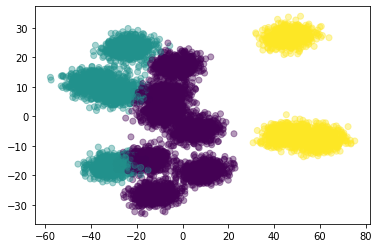

In [27]:
kmeans = KMeans(n_clusters=3, random_state=2021)
kmeans.fit(Data)
y = kmeans.predict(Data)
plt.scatter(new_pca[:,0],new_pca[:,1],c=y,alpha=0.4)

# เมื่อกำหนดให้ค่า K = 3 ที่ได้จากการดูกราฟด้านบน ทำให้เห็นผลลัพธ์ของค่าข้อมูลที่ทับซ้อนกันจะมีสีเข้ม

## ข้อ 3

### ลด Dimension ของข้อมูล

In [28]:
corr = np.corrcoef(Data.to_numpy().T)

In [29]:
corr.shape

(32, 32)

In [30]:
corr

array([[ 1.        , -0.03522889,  0.06557524, ...,  0.41074998,
        -0.03522889,  0.41074998],
       [-0.03522889,  1.        ,  0.26280354, ..., -0.10765056,
         1.        , -0.10765056],
       [ 0.06557524,  0.26280354,  1.        , ..., -0.01992461,
         0.26280354, -0.01992461],
       ...,
       [ 0.41074998, -0.10765056, -0.01992461, ...,  1.        ,
        -0.10765056,  1.        ],
       [-0.03522889,  1.        ,  0.26280354, ..., -0.10765056,
         1.        , -0.10765056],
       [ 0.41074998, -0.10765056, -0.01992461, ...,  1.        ,
        -0.10765056,  1.        ]])

In [31]:
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        if (i !=j) and (corr[i,j] == 1.):
            print(f'row = {i} column = {j} corrcoef = {corr[i,j]}') 

            # สรุป จากการรันจะพบว่า ไม่มีข้อมูลใดที่มีความสัมพันธ์กัน หรือ มี Correlation = 1 เนื่องจากรันแล้วไม่มีการเกิดผลลัพธ์ใด ๆ ออกมา จึงทำให้ทราบว่าข้อมูลไม่มีความสัมพันธ์กัน

### ทำ MDS

In [37]:
from sklearn.manifold import MDS

In [32]:
mds = MDS(n_components=2)

In [33]:
new_mds = mds.fit_transform(Data)

In [47]:
kmeans1 = KMeans(n_clusters=3,random_state=2021)
kmeans1.fit(Data)
a = kmeans1.predict(Data)

Text(0.5, 1.0, 'DataGenerator')

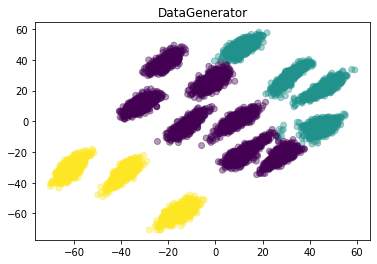

In [48]:
plt.scatter(new_mds[:,0],new_mds[:,1],c=a,alpha=0.4)
plt.title('DataGenerator') 

## ข้อ 4

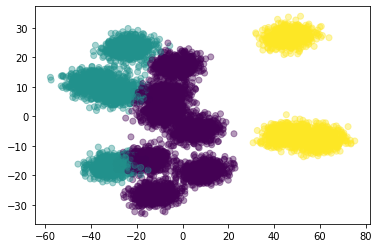

In [49]:
kmeans = KMeans(n_clusters=3, random_state=2021)
kmeans.fit(Data)
y = kmeans.predict(Data)
plt.scatter(new_pca[:,0],new_pca[:,1],c=y,alpha=0.4)

Text(0.5, 1.0, 'DataGenerator')

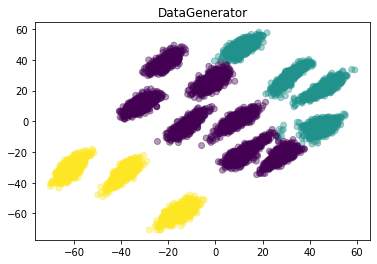

In [50]:
plt.scatter(new_mds[:,0],new_mds[:,1],c=a,alpha=0.4)
plt.title('DataGenerator')